# Estudo sobre a implementação de análise de áudio por Espectrograma

### Ferramentas utilizadas:

- Matplotlib
- Pydub
- Librosa
- Torchaudio
- Numpy

In [57]:
#Instalação das bibliotecas
# !pip install -U torch torchaudio
# !pip install matplotlib
# !pip install pydub
# !apt-get install ffmpeg
# !pip install librosa
# !pip install numpy

In [58]:
# Definição de bibliotecas:
import torch
import torchaudio
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa
import librosa.display
import numpy as np

In [59]:
# Caminho do áudio
caminho_audio = "Voz.wav"

In [60]:
# Reprodução do áudio
ipd.display(ipd.Audio(caminho_audio))

In [61]:
# Função para carregar e exibir informações básicas do áudio
def carregar_audio(caminho_audio):
    # Carrega o arquivo de áudio usando torchaudio e obtém a forma de onda e a taxa de amostragem
    waveform, sample_rate = torchaudio.load(caminho_audio)
    
    # Exibe o formato (dimensões) da forma de onda
    print(f"Formato do waveform: {waveform.size()}")
    
    # Exibe a taxa de amostragem do áudio
    print(f"Taxa de amostragem: {sample_rate}")
    
    # Exibe o valor mínimo da forma de onda
    print(f"Mínimo do waveform: {waveform.min()}")
    
    # Exibe o valor máximo da forma de onda
    print(f"Máximo do waveform: {waveform.max()}")
    
    # Exibe o valor médio da forma de onda
    print(f"Média do waveform: {waveform.mean()}")
    
    # Retorna a forma de onda e a taxa de amostragem
    return waveform, sample_rate

In [62]:
# Carrega e exibe informações básicas do áudio
waveform, sample_rate = carregar_audio(caminho_audio)

Formato do waveform: torch.Size([1, 199680])
Taxa de amostragem: 48000
Mínimo do waveform: -0.6717529296875
Máximo do waveform: 0.939910888671875
Média do waveform: -9.181713721773122e-06


In [63]:
# Função para plotar a forma de onda (waveform)
def plot_waveform(waveform, title="Waveform"):
    # Configura a figura para o gráfico com tamanho 10x3 polegadas
    plt.figure(figsize=(10, 3))
    
    # Plota a forma de onda transposta, convertida para um array numpy, com a cor azul
    plt.plot(waveform.t().numpy(), color='b')
    
    # Define o título do gráfico
    plt.title(title)
    
    # Define o rótulo do eixo x como "Amostras"
    plt.xlabel("Amostras")
    
    # Define o rótulo do eixo y como "Amplitude"
    plt.ylabel("Amplitude")
    
    # Adiciona uma grade ao gráfico para melhor visualização
    plt.grid(True)
    
    # Exibe o gráfico
    plt.show()

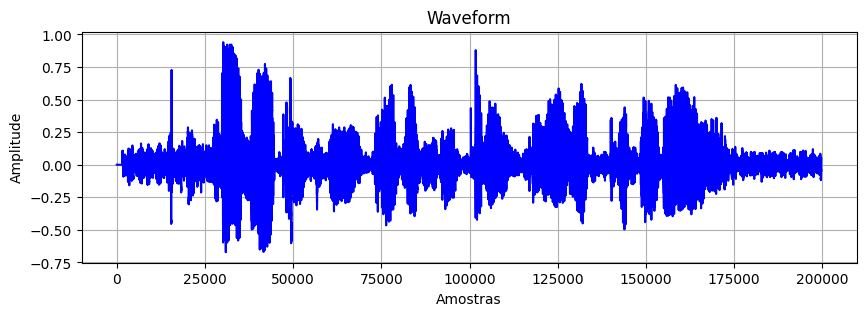

In [64]:
# Plotagem do waveform original
plot_waveform(waveform)

<div align="center">

## Normalização de Waveform

</div>

---
A normalização de um waveform é essencial para garantir que sua amplitude esteja dentro de uma faixa desejada, facilitando o processamento subsequente do sinal. Isso é realizado para evitar problemas de saturação ou perda de informações. A normalização é executada da seguinte forma:
$${waveform\underline{ }normalizado} = \frac{waveform - waveform.mean()}{waveform.abs().max()} $$
Essa equação subtrai a média do sinal de áudio de cada amostra e, em seguida, divide pelo valor absoluto máximo do sinal. Isso resulta em um waveform cuja média é zero e cujos valores estão na faixa de [-1, 1].

Onde:

- $waveform\underline{ }normalizado$ é o waveform normalizado.
- $waveform$ é o waveform original.
- $waveform.mean()$ é a média do waveform.
- $waveform.abs().max()$ é o valor absoluto máximo do waveform.

In [65]:
# Função para normalizar a forma de onda (waveform)
def normalizar_waveform(waveform):
    # Subtrai a média do waveform para centralizar os dados em torno de zero
    waveform -= waveform.mean()
    
    # Divide o waveform pelo valor absoluto máximo para escalar os dados entre -1 e 1
    waveform_normalizado = waveform / waveform.abs().max()
    
    # Retorna o waveform normalizado
    return waveform_normalizado

In [66]:
# Função para aplicar normalização e plotar resultados
def aplicar_normalizacao(waveform):
    # Aplica a normalização à forma de onda usando uma função externa 'normalizar_waveform'
    waveform_normalizado = normalizar_waveform(waveform)
    
    # Plota a forma de onda normalizada usando uma função externa 'plot_waveform'
    plot_waveform(waveform_normalizado, title="Waveform normalizado")
    
    # Retorna a forma de onda normalizada
    return waveform_normalizado

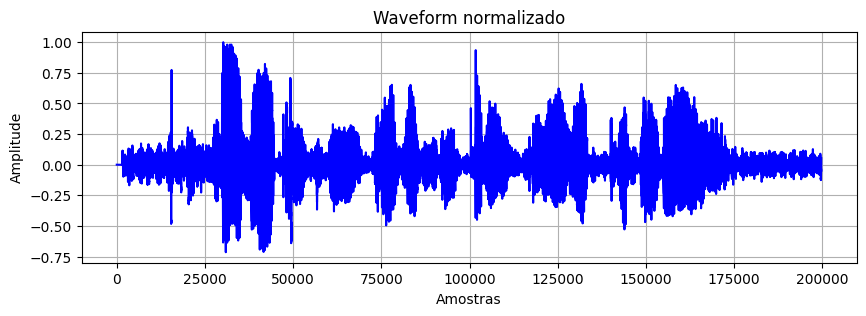

In [67]:
waveform_normalizado = aplicar_normalizacao(waveform)

<div align="center">

## Espectograma

</div>

---
Um espectrograma é uma representação visual da intensidade do espectro de frequência de um sinal de áudio em relação ao tempo. Ele é calculado usando a Transformada de Fourier de Curto Tempo (STFT), que divide o sinal de áudio em pequenos segmentos de tempo e calcula a Transformada de Fourier para cada segmento. A fórmula para o espectrograma é:
$${X(m,w)} = \sum\limits_{n = 0}^{N-1} (x[n] \cdot w[n-mH] \cdot e^{-jwn}) $$ 

Onde:

- $X(m,ω)$ é a magnitude da componente de frequência.
- $x[n]$ é o sinal de áudio.
- $w[n−mH]$ é uma janela temporal aplicada ao sinal.
- $H$ é o passo entre as janelas.
- $N$ é o tamanho da janela.

In [68]:
def plot_espectrograma(waveform):
    # Aplica a transformação Spectrogram para converter a forma de onda em um espectrograma
    espectrograma = torchaudio.transforms.Spectrogram()(waveform)
    
    # Configura a figura para o gráfico com tamanho 10x3 polegadas
    plt.figure(figsize=(10, 3))
    
    # Plota o espectrograma, convertendo para escala logarítmica e usando um mapa de cores espectral
    plt.imshow(espectrograma.log2()[0].numpy(), cmap='Spectral', aspect='auto')
    
    # Define o título do gráfico
    plt.title("Espectrograma")
    
    # Define o rótulo do eixo x como "Tempo"
    plt.xlabel("Tempo")
    
    # Define o rótulo do eixo y como "Frequência"
    plt.ylabel("Frequência")
    
    # Adiciona uma barra de cores ao lado do gráfico, formatada para mostrar decibéis
    plt.colorbar(format="%+2.0f dB")
    
    # Exibe o gráfico
    plt.show()


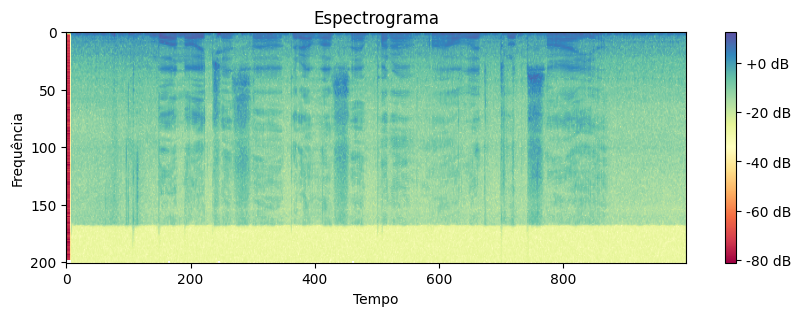

In [69]:
# Plotagem do espectrograma
plot_espectrograma(waveform)

In [70]:
def plot_espectrograma_gray(waveform):
    # Aplica a transformação Spectrogram para converter a forma de onda em um espectrograma
    espectrograma = torchaudio.transforms.Spectrogram()(waveform)
    
    # Configura a figura para o gráfico com tamanho 10x3 polegadas
    plt.figure(figsize=(10, 3))
    
    # Plota o espectrograma, convertendo para escala logarítmica e usando um mapa de cores em escala de cinza
    plt.imshow(espectrograma.log2()[0].numpy(), cmap='gray', aspect='auto')
    
    # Define o título do gráfico
    plt.title("Espectrograma em Escala de Cinza")
    
    # Define o rótulo do eixo x como "Tempo"
    plt.xlabel("Tempo")
    
    # Define o rótulo do eixo y como "Frequência"
    plt.ylabel("Frequência")
    
    # Adiciona uma barra de cores ao lado do gráfico, formatada para mostrar decibéis
    plt.colorbar(format="%+2.0f dB")
    
    # Exibe o gráfico
    plt.show()


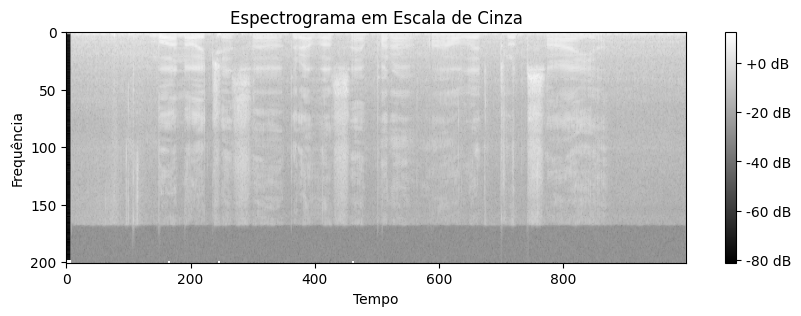

In [71]:
# Plotagem do espectrograma em cinza
plot_espectrograma_gray(waveform)

In [72]:
def plot_mel_espectrograma(waveform):
    # Aplica a transformação MelSpectrogram para converter a forma de onda em um espectrograma Mel
    mel_espectrograma = torchaudio.transforms.MelSpectrogram()(waveform)
    
    # Configura a figura para o gráfico com tamanho 10x3 polegadas
    plt.figure(figsize=(10, 3))
    
    # Plota o espectrograma Mel, convertendo para escala logarítmica
    plt.imshow(mel_espectrograma.log2()[0].numpy(), aspect='auto')
    
    # Define o título do gráfico
    plt.title("Espectrograma Mel")
    
    # Define o rótulo do eixo x como "Tempo"
    plt.xlabel("Tempo")
    
    # Define o rótulo do eixo y como "Frequência"
    plt.ylabel("Frequência")
    
    # Adiciona uma barra de cores ao lado do gráfico, formatada para mostrar decibéis
    plt.colorbar(format="%+2.0f dB")
    
    # Exibe o gráfico
    plt.show()

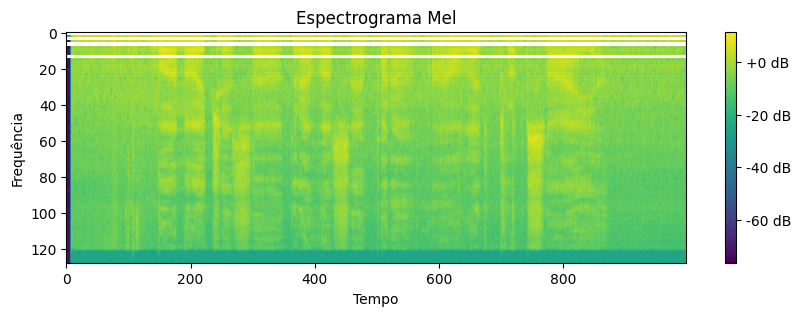

In [73]:
# Plotagem do espectrograma mel
plot_mel_espectrograma(waveform)

<div align="center">

## Resampling de Waveform

</div>

---
O resampling de um waveform envolve a alteração da taxa de amostragem do sinal de áudio. Isso pode ser feito aplicando o teorema da amostragem de Nyquist, que afirma que a taxa de amostragem mínima necessária para evitar a perda de informações é o dobro da frequência máxima presente no sinal. O novo waveform resampleado pode ser calculado usando a fórmula:
$${waveform\underline{ }resample[n]} = {waveform}\times[\frac{n}{f_{nova\underline{ }amostragem}}\times{f_{amostragem}}] $$
onde $n$ é o índice da amostra no novo waveform, ${f_{novamostragem}}$ é a nova taxa de amostragem desejada e $f_{amostragem}$ é a taxa de amostragem original do waveform.

In [74]:
# Função para realizar reamostragem e plotar a forma de onda reamostrada
def resample_waveform(waveform, sample_rate):
    # Define a nova taxa de amostragem como um décimo da taxa de amostragem original
    nova_taxa_amostragem = sample_rate / 10
    
    # Realiza a reamostragem da forma de onda usando torchaudio.transforms.Resample
    # Nota: waveform[0].view(1, -1) é usado para garantir que a forma de onda tenha a forma correta para o Resample
    waveform_resampleado = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=nova_taxa_amostragem)(waveform[0].view(1, -1))
    
    # Configura a figura para o gráfico com tamanho 10x4 polegadas
    plt.figure(figsize=(10, 4))
    
    # Plota a forma de onda reamostrada em azul
    plt.plot(waveform_resampleado[0].numpy(), color='b')
    
    # Define o título do gráfico
    plt.title("Waveform reamostrado")
    
    # Define o rótulo do eixo x como "Amostras"
    plt.xlabel("Amostras")
    
    # Define o rótulo do eixo y como "Amplitude"
    plt.ylabel("Amplitude")
    
    # Adiciona uma grade ao gráfico para melhor visualização
    plt.grid(True)
    
    # Exibe o gráfico
    plt.show()

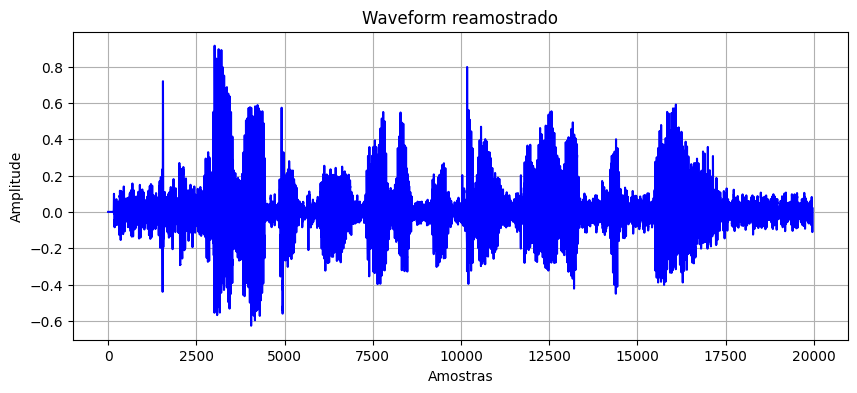

In [75]:
# Resample do waveform
resample_waveform(waveform, sample_rate)

<div align="center">

## Aplicar Ganho

</div>

---

A aplicação de ganho é uma operação comum no processamento de áudio que aumenta ou diminui a amplitude do sinal de áudio. O ganho é expresso em decibéis (dB) e pode ser positivo para aumentar a amplitude do sinal ou negativo para diminuí-la. A equação para aplicar ganho a um waveform é:
$${waveform\underline{ }ganho} = {torchaudio.functional.gain(waveform,gain\underline{ }db) }] $$
onde:

- $waveform\underline{ }ganho$ é o waveform após a aplicação do ganho.
- $waveform$ é o waveform original.
- $gain\underline{ }db$ é o valor do ganho em decibéis.

A aplicação de ganho em um sinal de áudio ajusta a amplitude do sinal. O ganho é frequentemente expressado em decibéis (dB).
Para aplicar um ganho de $G$ dB, o fator de ganho linear (g) é calculado como:

$$g = 10^\frac{G}{20}$$

Então, o sinal de saída y[n] é:

$$y[n] = g \cdot x[n]$$

Onde:

- $y[n]$ é o sinal de saída após a aplicação do ganho.
- $x[n]$ é o sinal de entrada original.
- $G$ é o valor do ganho em decibéis.
- $g$ é o fator de ganho linear correspondente.

In [76]:
# Função para aplicar ganho a uma forma de onda e plotar o resultado
def aplicar_ganho(waveform, gain_db=5.0):
    # Aplica o ganho especificado à forma de onda usando torchaudio.functional.gain
    waveform_ganho = torchaudio.functional.gain(waveform, gain_db)
    
    # Plota a forma de onda com ganho aplicado
    plot_waveform(waveform_ganho, title="Waveform com ganho")
    
    # Retorna a forma de onda com ganho aplicado
    return waveform_ganho

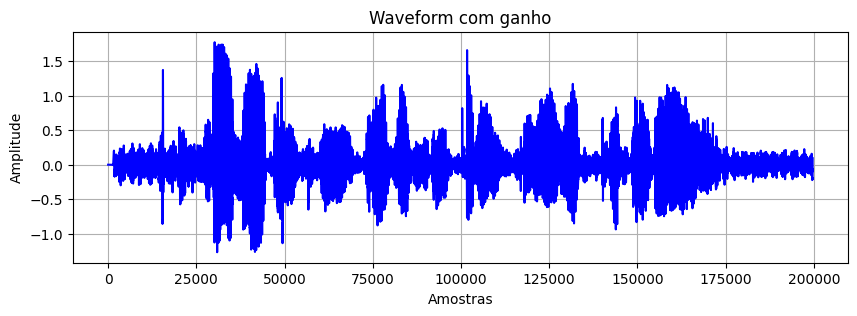

In [77]:
waveform_ganho = aplicar_ganho(waveform_normalizado)

<div align="center">

## Aplicar Filtro Passa-Baixa

</div>

---

Um filtro passa-baixa é um tipo de filtro que permite a passagem de frequências abaixo de uma determinada frequência de corte enquanto atenua as frequências acima dela. Isso é útil para suavizar o sinal ou remover componentes de alta frequência indesejadas. A função para aplicar um filtro passa-baixa em um waveform é:
$${waveform\underline{ }passa\underline{ }baixa} = {torchaudio.functional.lowpass\underline{ }biquad(waveform,sample\underline{ }rate,cutoff\underline{ }freq)}] $$

onde:

- $waveform\underline{ }passa\underline{ }baixa$ é o waveform após a aplicação do filtro passa-baixa.
- $waveform$ é o waveform original.
- $sample\underline{ }rate$ é a taxa de amostragem do waveform.
- $cutoff\underline{ }freq$ é a frequência de corte do filtro, em Hz.

A fórmula da resposta em frequência de um filtro passa-alta de segunda ordem é:

$${H(z)} = \frac{b_0 + b_1z^{-1} + b_2z^{-2}}{1 + + a_1z^{-1} + a_2z^{-2}} $$

Para um filtro passa-baixa, os coeficientes podem ser calculados como:

$${w_c} = 2\pi \frac{cutoff\underline{ }freq}{sample\underline{ }rate} $$
$${\alpha} = \frac{\sin(w_c)}{2Q} $$

Os coeficientes do filtro são:

$${b_0} = \frac{(1 - \cos(w_c))}{2} $$
$${b_1} = {1 - \cos(w_c)} $$
$${b_2} = \frac{(1 - \cos(w_c))}{2} $$
$${a_0} = {1 + \alpha} $$
$${a_1} = {-2\cos(w_c)} $$
$${a_2} = {1 - \alpha} $$

O sinal filtrado y[n] é então obtido utilizando a equação de diferença:

$${y[n]} = {\frac{1}{a_0}}(b_0x[n] + b_1x[n - 1] + b_2x[n - 2] - a_1y[n - 1] - a_2y[n - 2] $$

In [78]:
# Função para aplicar um filtro passa-baixa a uma forma de onda e plotar o resultado
def aplicar_filtro_passa_baixa(waveform, sample_rate, cutoff_freq=3000):
    # Aplica o filtro passa-baixa à forma de onda usando torchaudio.functional.lowpass_biquad
    waveform_passa_baixa = torchaudio.functional.lowpass_biquad(waveform, sample_rate, cutoff_freq)
    
    # Plota a forma de onda após a aplicação do filtro passa-baixa
    plot_waveform(waveform_passa_baixa, title="Waveform após filtro passa-baixa")
    
    # Retorna a forma de onda após a aplicação do filtro passa-baixa
    return waveform_passa_baixa

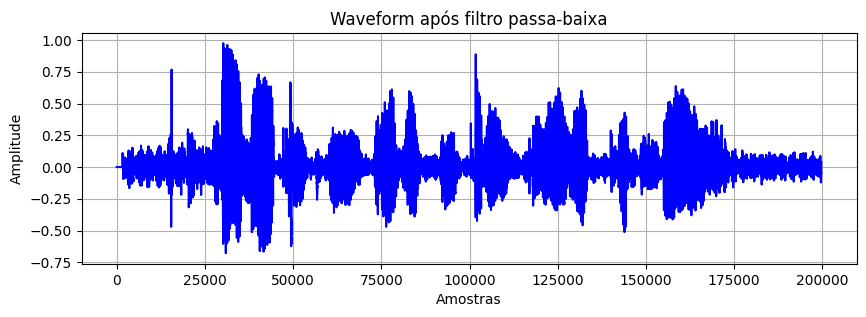

In [79]:
waveform_passa_baixa = aplicar_filtro_passa_baixa(waveform_normalizado, sample_rate)

<div align="center">

## Aplicar Filtro Passa-Alta

</div>

---

Um filtro passa-alta é um tipo de filtro que permite a passagem de frequências acima de uma determinada frequência de corte enquanto atenua as frequências abaixo dela. Isso é útil para remover componentes de baixa frequência indesejadas ou para realçar os componentes de alta frequência de um sinal de áudio. A função para aplicar um filtro passa-alta em um waveform é:
$${waveform\underline{ }passa\underline{ }alta} = {torchaudio.functional.highpass\underline{ }biquad(waveform,sample\underline{ }rate,cutoff\underline{ }freq)}] $$

onde:

- $waveform\underline{ }passa\underline{ }alta$ é o waveform após a aplicação do filtro passa-alta.
- $waveform$ é o waveform original.
- $sample\underline{ }rate$ é a taxa de amostragem do waveform.
- $cutoff\underline{ }freq$ é a frequência de corte do filtro, em Hz.

A fórmula da resposta em frequência de um filtro passa-alta de segunda ordem é:

$${H(z)} = \frac{b_0 + b_1z^{-1} + b_2z^{-2}}{1 + + a_1z^{-1} + a_2z^{-2}} $$

Para um filtro passa-alta, os coeficientes podem ser calculados como:

$${w_c} = 2\pi \frac{cutoff\underline{ }freq}{sample\underline{ }rate} $$
$${\alpha} = \frac{\sin(w_c)}{2Q} $$

Os coeficientes do filtro são:

$${b_0} = \frac{(1 + \cos(w_c))}{2} $$
$${b_1} = {-(1 + \cos(w_c))} $$
$${b_2} = \frac{(1 + \cos(w_c))}{2} $$
$${a_0} = {1 + \alpha} $$
$${a_1} = {-2\cos(w_c)} $$
$${a_2} = {1 - \alpha} $$

O sinal filtrado y[n] é então obtido utilizando a equação de diferença:

$${y[n]} = {\frac{1}{a_0}}(b_0x[n] + b_1x[n - 1] + b_2x[n - 2] - a_1y[n - 1] - a_2y[n - 2] $$

In [1]:
# Função para aplicar um filtro passa-alta a uma forma de onda e plotar o resultado
def aplicar_filtro_passa_alta(waveform, sample_rate, cutoff_freq=2000):
    # Aplica o filtro passa-alta à forma de onda usando torchaudio.functional.highpass_biquad
    waveform_passa_alta = torchaudio.functional.highpass_biquad(waveform, sample_rate, cutoff_freq)
    
    # Plota a forma de onda após a aplicação do filtro passa-alta
    plot_waveform(waveform_passa_alta, title="Waveform após filtro passa-alta")
    
    # Retorna a forma de onda após a aplicação do filtro passa-alta
    return waveform_passa_alta

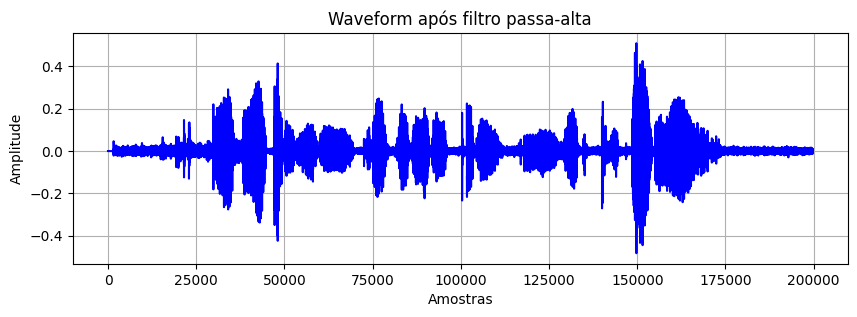

In [81]:
waveform_passa_alta = aplicar_filtro_passa_alta(waveform_normalizado, sample_rate)

<div align="center">

## Aplicar Filtro Passa-Banda

</div>

---

Um filtro passa-banda é um tipo de filtro que permite a passagem de frequências dentro de uma determinada faixa de frequência, enquanto atenua as frequências fora dessa faixa. Isso é útil para destacar uma banda específica de frequência de um sinal de áudio ou para remover frequências fora dessa banda. A função para aplicar um filtro passa-banda em um waveform é:
$${waveform\underline{ }passa\underline{ }banda} = {torchaudio.functional.bandpass\underline{ }biquad(waveform, sample\underline{ }rate, central\underline{ }freq, Q)}] $$

onde:

- $waveform\underline{ }passa\underline{ }alta$ é o waveform após a aplicação do filtro passa-alta.
- $waveform$ é o waveform original.
- $sample\underline{ }rate$ é a taxa de amostragem do waveform.
- $central\underline{ }freq$ é a frequência central do filtro, em Hz.
- $Q$ é o fator de qualidade do filtro, que controla a largura da banda de passagem.

A fórmula da resposta em frequência de um filtro passa-alta de segunda ordem é:

$${H(z)} = \frac{b_0 + b_1z^{-1} + b_2z^{-2}}{1 + + a_1z^{-1} + a_2z^{-2}} $$

Para um filtro passa-alta, os coeficientes podem ser calculados como:

$${w_0} = 2\pi \frac{cutoff\underline{ }freq}{sample\underline{ }rate} $$
$${\alpha} = \frac{\sin(w_c)}{2Q} $$

Os coeficientes do filtro são:

$${b_0} = {\alpha} $$
$${b_1} = {0} $$
$${b_2} = {-\alpha} $$
$${a_0} = {1 + \alpha} $$
$${a_1} = {-2\cos(w_0)} $$
$${a_2} = {1 - \alpha} $$

O sinal filtrado y[n] é então obtido utilizando a equação de diferença:

$${y[n]} = {\frac{1}{a_0}}(b_0x[n] + b_1x[n - 1] + b_2x[n - 2] - a_1y[n - 1] - a_2y[n - 2] $$

In [82]:
# Função para aplicar um filtro passa-banda a uma forma de onda e plotar o resultado
def aplicar_filtro_passa_banda(waveform, sample_rate, central_freq=2000, Q=0.707):
    # Aplica o filtro passa-banda à forma de onda usando torchaudio.functional.bandpass_biquad
    waveform_passa_banda = torchaudio.functional.bandpass_biquad(waveform, sample_rate, central_freq, Q)
    
    # Plota a forma de onda após a aplicação do filtro passa-banda
    plot_waveform(waveform_passa_banda, title="Waveform após filtro passa-banda")
    
    # Retorna a forma de onda após a aplicação do filtro passa-banda
    return waveform_passa_banda

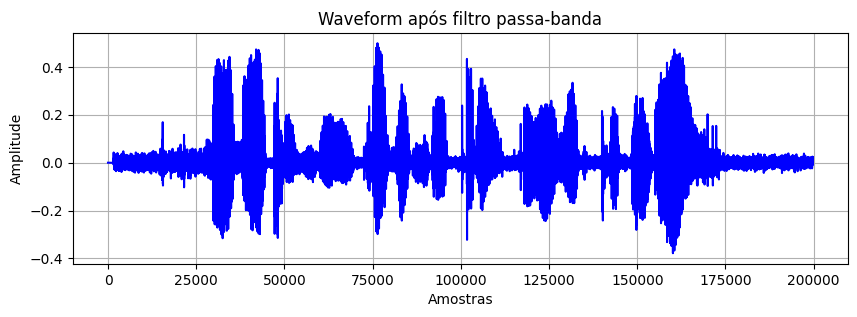

In [83]:
waveform_passa_banda = aplicar_filtro_passa_banda(waveform_normalizado, sample_rate)

<div align="center">
    
## Aplicar Inversão de Fase
    
</div>

---

A inversão de fase é uma operação que inverte o sinal de áudio no tempo, resultando em uma inversão da polaridade do sinal. Isso significa que as partes positivas do sinal se tornam negativas e vice-versa. A função para aplicar a inversão de fase em um waveform é simplesmente multiplicar o waveform por -1:
$${waveform\underline{ }invertido = -waveform} $$

onde:

- $waveform\underline{ }invertido$ é o waveform após a aplicação da inversão de fase.
- $waveform$ é o waveform original.

Matematicamente, isso pode ser representado como:

$${y[n] = -x[n]} $$

Onde:

- y[n] é o sinal de saída após a inversão de fase.
- x[n] é o sinal de entrada original.

In [84]:
# Função para aplicar a inversão de fase a uma forma de onda e plotar o resultado
def aplicar_inversao_fase(waveform):
    # Aplica a inversão de fase multiplicando a forma de onda por -1
    waveform_invertido = -waveform
    
    # Plota a forma de onda com inversão de fase
    plot_waveform(waveform_invertido, title="Waveform com inversão de fase")
    
    # Retorna a forma de onda com inversão de fase
    return waveform_invertido

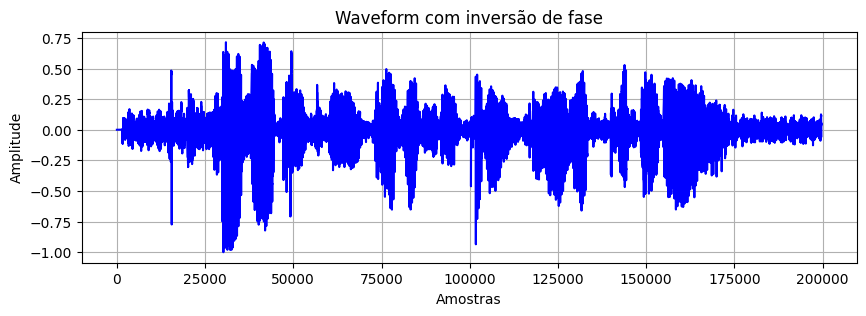

In [85]:
waveform_invertido = aplicar_inversao_fase(waveform_normalizado)

<div align="center">
    
## Aplicar Mudança de Pitch

</div>

---

<div align="justify">
    
A mudança de pitch é uma técnica que altera a frequência fundamental de um sinal de áudio sem alterar sua duração. Isso é útil para transposição de tons ou para criar efeitos de voz diferentes. A mudança de pitch pode ser realizada através de um processo de resampling, onde a taxa de amostragem do sinal é modificada. A fórmula para aplicar a mudança de pitch em um waveform é:
$${waveform\underline{ }pitch\underline{ }shifted = torchaudio.transforms.Resample(orig\underline{ }freq,new\underline{ }freq)(waveform)} $$

onde:

- $waveform\underline{ }pitch\underline{ }shifted$ é o waveform após a aplicação da mudança de pitch.
- $orig\underline{ }freq$ é a frequência original do waveform, em Hz.
- $new\underline{ }freq$ é a nova frequência desejada após a mudança de pitch, em Hz.

Para mudar o pitch de um fator $p$, a nova taxa de amostragem $(f_{new})$ é:
$$f_{new} = f_{orig} \times p$$

- $f_{orig}$ é a taxa de amostragem original
- $p$ é o fator de mudança de pitch.

Após o resampling, a frequência do sinal será escalada pelo fator $p$. Este processo pode ser realizado utilizando técnicas de interpolação para calcular as novas amostras do sinal.

</div>

In [86]:
# Função para aplicar uma mudança de pitch a uma forma de onda e plotar o resultado
def aplicar_mudanca_pitch(waveform, sample_rate, factor=1.5):
    # Aplica a mudança de pitch à forma de onda usando torchaudio.transforms.Resample
    waveform_pitch_shifted = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=int(sample_rate * factor))(waveform)
    
    # Plota a forma de onda com a mudança de pitch
    plot_waveform(waveform_pitch_shifted, title="Waveform com mudança de pitch")
    
    # Retorna a forma de onda com a mudança de pitch
    return waveform_pitch_shifted

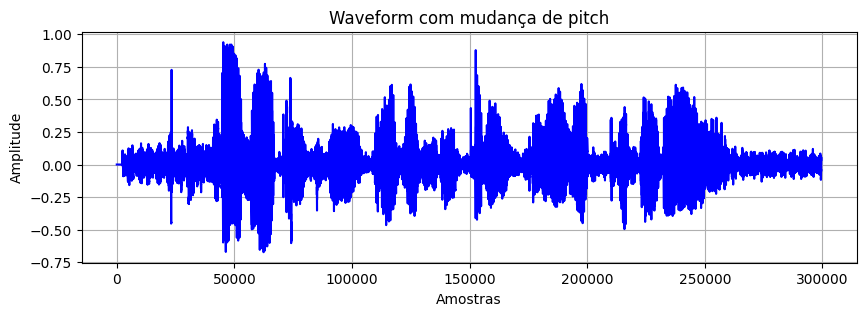

In [87]:
waveform_pitch_shifted = aplicar_mudanca_pitch(waveform, sample_rate)

In [88]:
# Extração de características com Librosa
audio_librosa, sr_librosa = librosa.load(caminho_audio, sr=None)

<div align="center">
    
## Espectograma Mel

</div>

---

<div align="justify">
    
O espectrograma Mel é uma representação do sinal de áudio onde as frequências são convertidas para a escala Mel, que é uma escala perceptualmente linear. Aqui está o processo teórico para calcular o espectrograma Mel:

1. Transformada de Fourier de Curto Prazo (STFT):

   A STFT é usada para converter o sinal de tempo contínuo em uma representação de tempo-frequência. A STFT é calculada aplicando a Transformada de Fourier (DFT) a segmentos (janelas) do sinal:

$${X(m, k) = \sum\limits_{n = 0}^{N-1} {x[n + mH]w[n]e^{-j2\pi kn / N}}} $$

Onde:

- $X(m,k)$ é o valor da STFT na janela m e na frequência k.
- $x[n]$ é o sinal de áudio.
- $w[n]$ é a janela (ex.: janela de Hamming).
- $N$ é o tamanho da DFT.
- $H$ é o hop length (passo entre as janelas).

2. Conversão para a Escala Mel:

   A escala Mel é calculada a partir das frequências lineares usando a fórmula:

$$m = 2595 \log_{10} (1 + \frac {f}{100}) $$
Onde:

- $m$ é a frequência na escala Mel.
- $f$ é a frequência em Hertz.

O espectrograma linear é convertido para a escala Mel somando as energias dos bins de frequência correspondentes aos bins de frequência Mel.

3. Conversão para Decibéis

   A conversão do espectrograma Mel de amplitude para decibéis é feita usando a função `librosa.amplitude_to_db`:
   $$mel\underline{ }spect\underline{ }db = librosa.amplitude\underline{ }to\underline{ }db(mel\underline{ }spect, ref=np.max) $$

    O valor em decibéis D é calculado a partir do valor em amplitude A usando a fórmula:

   $$D = 10\log_{10}(\frac{A}{ref}) $$
Onde:

- $A$ é a amplitude do espectrograma Mel. 
- $ref$ é o valor de referência (neste caso, a amplitude máxima no espectrograma Mel).

</div>

In [89]:
# Função para análise de áudio com librosa e exibição de espectrograma de Mel
def analizar_com_librosa(caminho_audio):
    # Carrega o arquivo de áudio utilizando o librosa.load
    audio_librosa, sr_librosa = librosa.load(caminho_audio, sr=None)
    
    # Calcula o espectrograma mel do áudio usando o librosa.feature.melspectrogram
    mel_spect = librosa.feature.melspectrogram(y=audio_librosa, sr=sr_librosa)
    
    # Converte o espectrograma para escala de decibéis utilizando librosa.amplitude_to_db
    mel_spect_db = librosa.amplitude_to_db(mel_spect, ref=np.max)

    # Plota o espectrograma utilizando librosa.display.specshow
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mel_spect_db, sr=sr_librosa, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel Spectrogram (librosa)')
    plt.tight_layout()
    plt.show()

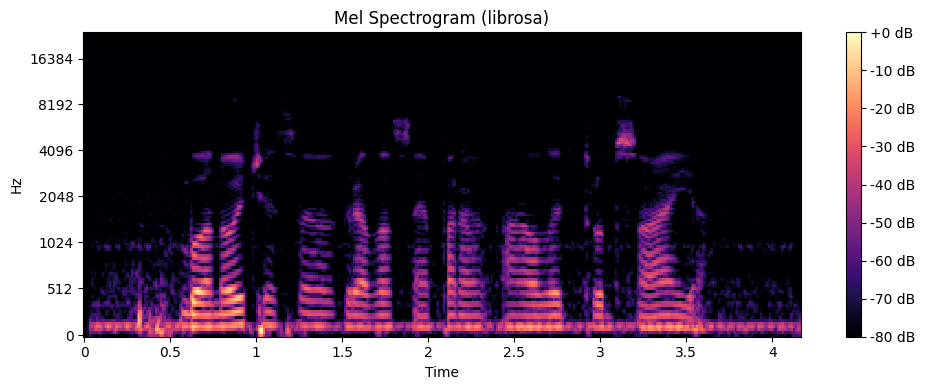

In [90]:
# Análise com librosa
analizar_com_librosa(caminho_audio)

In [91]:
# Função para exibir STFT (Short-Time Fourier Transform)
def plot_stft(waveform, sample_rate):
    y, sr = librosa.load(caminho_audio, sr=None, mono=True)
    # Parâmetros para a STFT
    n_fft = 4096       # Tamanho da janela de FFT
    hop_length = 512   # Passo entre as janelas
    win_length = 4096  # Tamanho da janela de análise

    # Calcula a Transformada Rápida de Fourier (STFT) do sinal de áudio
    S = librosa.stft(y, n_fft=n_fft, hop_length=hop_length, win_length=win_length)
    S = np.abs(S)  # Obtém as magnitudes das frequências

    # Plota o espectrograma STFT
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), 
                             y_axis='log', x_axis='time', sr=sr)

    # Adiciona barra de cor para representar os valores em decibéis
    plt.colorbar(format='%+2.0f dB')
    
    # Título e configurações do gráfico
    plt.title('Spectrograma de Fourier de Curto Prazo (STFT)')
    plt.tight_layout()
    plt.show()

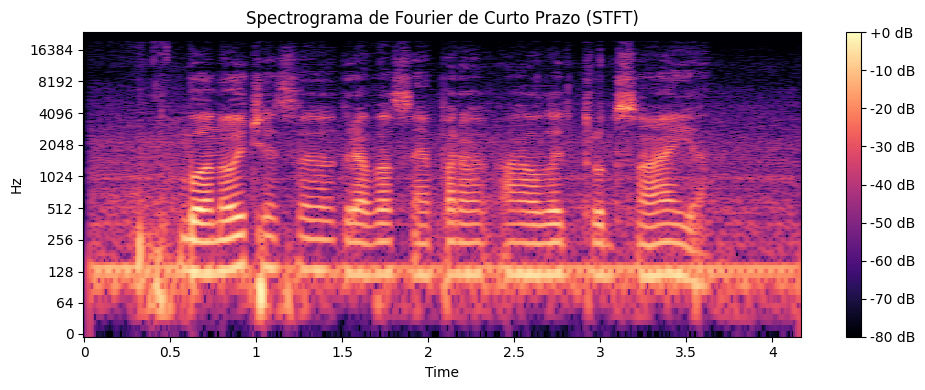

In [92]:
# Exibição do STFT
plot_stft(waveform, sample_rate)

<div align="center">

## Zero-Crossing Rate

</div>

---

A taxa de cruzamento por zero é uma medida da quantidade de vezes que o sinal de áudio cruza o eixo zero em uma unidade de tempo. É uma métrica útil para caracterizar a periodicidade e a tonalidade de um sinal de áudio. A taxa de cruzamento por zero pode ser calculada usando a seguinte fórmula:
$${ZeroCrossingRate} = \frac{1}{T} \sum\limits_{t = 1}^{T} |sign(x[t]) - sign(x[t-1])| $$
onde:
- $T$ é o número total de amostras.
- $x[t]$ é o valor do sinal de áudio no tempo 
- $sign(x)$ retorna 1 se x for positivo, -1 se x for negativo e 0 se x for zero.

In [93]:
# Função para extrair Zero-Crossing Rate
def plot_zero_crossing_rate(audio, sr):
    # Calcula a taxa de cruzamento por zero
    zero_crossings = librosa.feature.zero_crossing_rate(y=audio)
    
    # Plota a taxa de cruzamento por zero
    plt.figure(figsize=(10, 4))
    plt.plot(zero_crossings[0])  # zero_crossings retorna uma matriz, usamos zero_crossings[0] para obter a primeira linha
    plt.title("Zero-Crossing Rate")
    plt.xlabel("Tempo")
    plt.ylabel("Taxa de cruzamento por zero")
    plt.grid(True)
    plt.show()

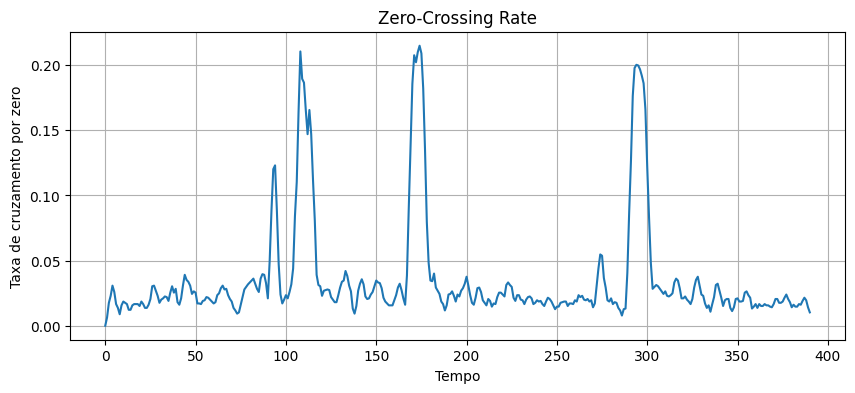

In [94]:
plot_zero_crossing_rate(audio_librosa, sr_librosa)

<div align="center">

## Spectral Centroid

</div>

---

O centroide espectral é uma medida estatística que representa a "posição central" do espectro de frequência de um sinal de áudio. Ele fornece informações sobre o brilho percebido do som. O centroide espectral é calculado como a média ponderada das frequências presentes no espectro, onde as amplitudes das frequências são usadas como pesos. A fórmula para calcular o centroide espectral é:
$${C} = \frac{\sum\limits_{f = 0}^{N-1} f \cdot S[f]}{\sum\limits_{f = 0}^{N-1} S[f]}  $$
onde:
- $C$ é o centroide espectral.
- $f$ é a frequência.
- $S[f]$ é a magnitude do espectro na frequência $f$.
- $N$ é o número total de frequências no espectro.

In [95]:
# Função para extrair o Centróide Espectral
def plot_spectral_centroid(audio, sr):
    # Calcula o centróide espectral
    spectral_centroid = librosa.feature.spectral_centroid(y=audio, sr=sr)
    
    # Gera eixo de tempo correspondente
    tempo = librosa.times_like(spectral_centroid)
    
    # Plota o centróide espectral ao longo do tempo
    plt.figure(figsize=(10, 4))
    plt.semilogy(tempo, spectral_centroid.T, label='Spectral centroid')
    plt.ylabel('Hz')  # Rótulo do eixo y para frequência
    plt.xlabel('Tempo (s)')  # Rótulo do eixo x para tempo em segundos
    plt.xlim([tempo.min(), tempo.max()])  # Define os limites do eixo x
    plt.title('Spectral centroid')  # Título do gráfico
    plt.grid(True)  # Adiciona grade ao gráfico
    plt.show()

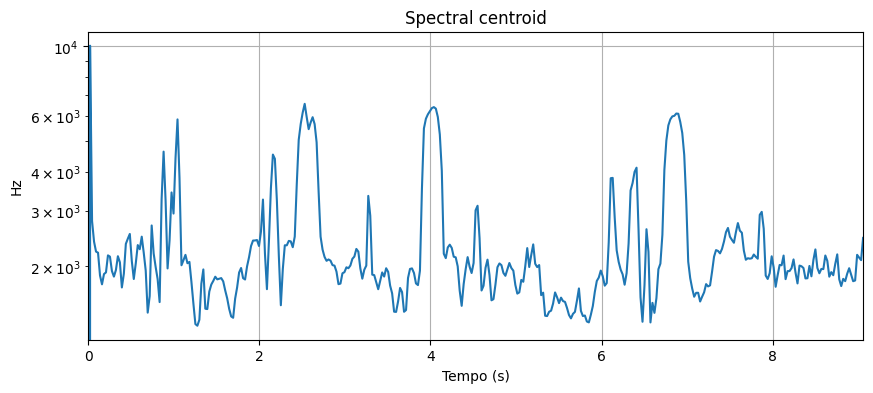

In [96]:
plot_spectral_centroid(audio_librosa, sr_librosa)